# лабораторная работа 3.4.1

In [5]:
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
from scipy.optimize import curve_fit
from IPython.display import display, Math

In [39]:
def plot(x_ax, x_err, y_ax, y_err, label_x, label_y, graph_name, approx_lab):
    print("x_ax = ", x_ax)
    print("y_ax = ", y_ax)

    # plot_linear(x, I, 1, '')


    coeffs1, cov1 = np.polyfit(x_ax, y_ax, 1, cov = True)  # линейная аппроксимация
    a1, b1 = coeffs1  # I = a*x + b

    x_fit1 = np.linspace(0, max(x_ax), 100)
    y_fit1 = a1*x_fit1 + b1

    # coeffs2, cov2 = np.polyfit(x_ax[[0, 2, 3]], y_ax[[0, 2, 3]], 1, cov = True)  # линейная аппроксимация
    # a2, b2 = coeffs2  # I = a*x + b

    # x_fit2 = np.linspace(min(x_ax), max(x_ax), 100)
    # y_fit2 = a2*x_fit2 + b2

    sigma_a1 = np.sqrt(cov1[0,0])  # стандартная ошибка наклона
    # sigma_a2 = np.sqrt(cov2[0,0])  # стандартная ошибка наклона
    sigma_b1 = np.sqrt(cov1[1,1])  # стандартная ошибка свободного члена
    # sigma_b2 = np.sqrt(cov2[1,1])  # стандартная ошибка свободного члена

    print(approx_lab + ":")
    print(f"a = {a1:.3f} ± {sigma_a1:.3f}")
    print(f"b = {b1:.3f} ± {sigma_b1:.3f}")
    print("Covariance matrix:\n", cov1)

    # print(f"a2 = {a2:.3f} ± {sigma_a2:.3f}")
    # print(f"b2 = {b2:.3f} ± {sigma_b2:.3f}")
    # print("Covariance matrix:\n", cov2)

    plt.errorbar(
        x_ax, y_ax,
        yerr=y_err,
        xerr=x_err,
        fmt= 'k.',
        # capsize=4,
        markersize=1,
        # label='Эксперимент'
    )

    # plt.plot(x, I, 'o', markersize = 3, label='Данные')
    plt.plot(x_fit1, y_fit1, '-', label=approx_lab)
    # plt.plot(x_fit2, y_fit2, '-', label='Линейная аппроксимация')

    plt.suptitle(graph_name)
    plt.xlabel(label_x)
    plt.ylabel(label_y)

    plt.grid(True, which='both', alpha=0.5)
    plt.minorticks_on()
    plt.legend()


In [40]:
I   = [0.22, 0.32, 0.42, 0.52, 0.62, 0.72, 0.82, 0.92, 1.02, 1.15]  # А
phi = [ 1.6,  2.3,  3.1,    4,  4.5,    5,  5.5,    6,  6.5,  7.1]  # мВб
dphi = [0.2] * len(phi)
pcu = [ -30,  -40,  -80, -100, -140, -170, -220, -250, -290]        # мкН
pal = [  20,   70,  120,  170,  250,  320,  410,  500,  580]        # мкН
dp  = [10] * len(pcu)

sn = 72 * 1e-4 # м

[222.2222222222222, 319.4444444444444, 430.55555555555554, 555.5555555555555, 624.9999999999999, 694.4444444444443, 763.8888888888888, 833.3333333333333, 902.7777777777777, 986.111111111111]
x_ax =  [222.22222222 319.44444444 430.55555556 555.55555556 625.
 694.44444444 763.88888889 833.33333333 902.77777778 986.11111111]
y_ax =  [0.22 0.32 0.42 0.52 0.62 0.72 0.82 0.92 1.02 1.15]
:
a = 0.001 ± 0.000
b = -0.095 ± 0.034
Covariance matrix:
 [[ 2.59451259e-09 -1.64319131e-06]
 [-1.64319131e-06  1.18925170e-03]]


C:\Users\1\AppData\Local\Temp\ipykernel_7668\2846400409.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


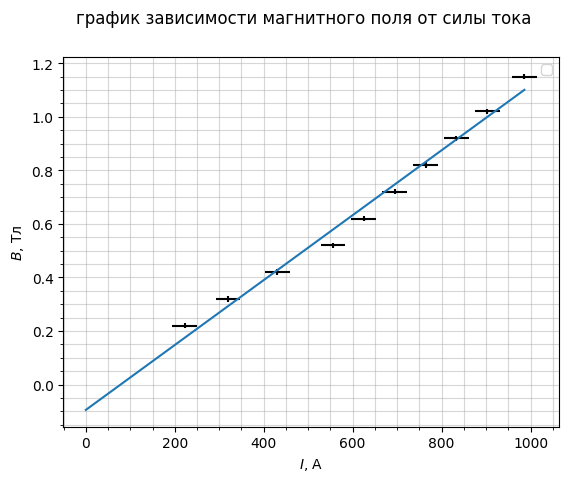

In [41]:
B = [phi[i] / sn for i in range(len(phi))]
print(B)
dB = [dphi[i] / phi[i] * B[i] for i in range(len(B))]
dI = [0.01] * len(I)

x_ax = np.array(B)
x_err = np.array(dB)
y_ax = np.array(I)
y_err = np.array(dI)

plot(x_ax, x_err, y_ax, y_err,
         r"$I$, A", r"$B$, Тл",
         "график зависимости магнитного поля от силы тока",
         "")

x_ax =  [ 4.9382716  10.20447531 18.53780864 30.86419753 39.0625     48.22530864
 58.35262346 69.44444444 81.5007716 ]
y_ax =  [ 30  40  80 100 140 170 220 250 290]
$\Delta P_{Cu}$:
a = 3.476 ± 0.107
b = 7.177 ± 5.058
Covariance matrix:
 [[ 1.14269333e-02 -4.58512556e-01]
 [-4.58512556e-01  2.55788873e+01]]
x_ax =  [ 4.9382716  10.20447531 18.53780864 30.86419753 39.0625     48.22530864
 58.35262346 69.44444444 81.5007716 ]
y_ax =  [ 20  70 120 170 250 320 410 500 580]
$\Delta P_{Al}$:
a = 7.337 ± 0.229
b = -23.271 ± 10.831
Covariance matrix:
 [[ 5.24031692e-02 -2.10270861e+00]
 [-2.10270861e+00  1.17303105e+02]]


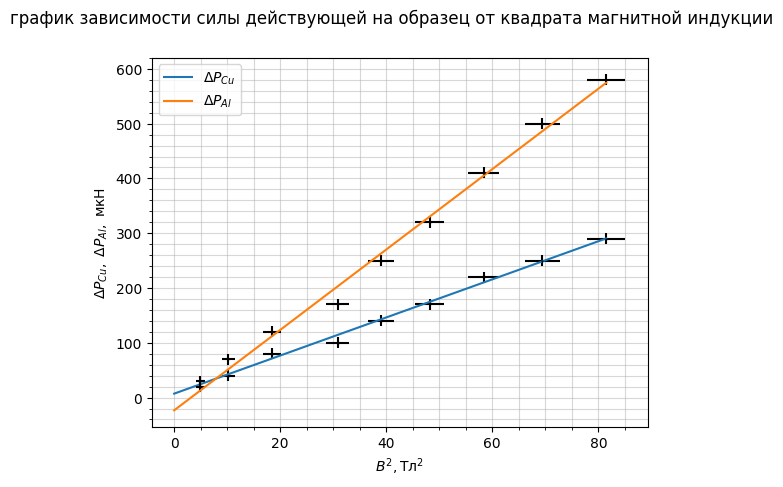

In [42]:

x_ax = [B[i] ** 2 for i in range(len(B) - 1)]
x_err = [x_ax[i] * dB[i]/B[i] * 2 ** (1/2) for i in range(len(x_ax))]
x_ax = np.array(x_ax) * 1e-4
x_err = np.array(x_err) * 1e-4
y_ax1 = np.array(pcu) * (-1)
y_ax2 = np.array(pal)
y_err1 = y_err2 = np.array(dp)

plot(x_ax, x_err, y_ax1, y_err1,
     r"$B^2, \text{Тл}^2$", r"$\Delta P_{Cu}, \ \Delta P_{Al}, \ \text{мкН}$",
     "график зависимости силы действующей на образец от квадрата магнитной индукции",
     r"$\Delta P_{Cu}$")

plot(x_ax, x_err, y_ax2, y_err2,
     r"$B^2, \text{Тл}^2$", r"$\Delta P_{Cu}, \ \Delta P_{Al}, \ \text{мкН}$",
     "график зависимости силы действующей на образец от квадрата магнитной индукции",
     r"$\Delta P_{Al}$")


plt.show()


In [6]:


a = 7.337 * 1e-4
da = 0.229 * 1e-4
mu0 = 4.0 * np.pi * 1e-7 # Гн/м
d = 1e-2
dd = 0.0001
s = np.pi * d ** 2 / 4
ds = s * sqrt(2 * (dd/d)**2)

chi = a * 2 * mu0 / s

print("\\chi_{Al} = ", chi)
print("dchi_{Al} = ", chi * sqrt((da/a)**2 + (ds/s)**2))

\chi_{Al} =  2.3478400000000002e-05
dchi_{Al} =  8.045140727867971e-07


In [7]:
a = 3.476 * 1e-4
da = 0.107 * 1e-4
mu0 = 4.0 * np.pi * 1e-7 # Гн/м
d = 1e-2
dd = 0.0001
s = np.pi * d ** 2 / 4
ds = s * sqrt(2 * (dd/d)**2)

chi = a * 2 * mu0 / s

print("\\chi_{Cu} = ", -1 * chi)
print("dchi_{Cu} = ", chi * sqrt((da/a)**2 + (ds/s)**2))

\chi_{Cu} =  -1.11232e-05
dchi_{Cu} =  3.768061512873696e-07
